In [67]:
# Elastic Net
import pandas as pd
import numpy as np

In [68]:
#!pip install xlrd

In [69]:
df_1990 = pd.read_excel("SocCapVariables.1990.1997.2005.xls", sheet_name="1990")
df_2005 = pd.read_excel("social_capital.97-05-09.updated8.28.17.xlsx", sheet_name= '2005')

df_1997 = pd.read_excel("social_capital.97-05-09.updated8.28.17.xlsx", sheet_name= '1997')
df_2009 = pd.read_excel("social_capital.97-05-09.updated8.28.17.xlsx", sheet_name= '2009')

df_2014 = pd.read_excel("social-capital-variables-spreadsheet.12-8-17.xlsx")

In [70]:
df_1990.columns

Index(['fips', 'AREANAME', 'bowl90', 'civic90', 'fit90', 'golf90', 'relig90',
       'sport90', 'memspt90', 'pol90', 'prof90', 'bus90', 'labor90',
       'memnec90', 'assn90', 'respn90', 'pvote88', 'pvote92', 'nccs90',
       'pop90', 'ski90pcm', 'ski90std'],
      dtype='object')

In [71]:
df_1997.columns

Index(['fips', 'areaname', 'bowl97', 'civic97', 'fitnes97', 'golf97',
       'relig97', 'sport97', 'memspt97', 'pol97', 'prof97', 'bus97', 'labor97',
       'memnec97', 'respn00', 'pvote96', 'pop97', 'nccs97', 'assn97', 'sk97'],
      dtype='object')

In [72]:
df_2005.columns

Index(['fips', 'areaname', 'relig05', 'civic05', 'bus05', 'pol05', 'prof05',
       'labor05', 'bowl05', 'fitns05', 'golf05', 'sport05', 'pop05', 'pvote04',
       'respn05', 'nccs05', 'assn05', 'sk05'],
      dtype='object')

In [73]:
df_2009.columns

Index(['fips', 'areaname', 'relig09', 'civic09', 'bus09', 'pol09', 'prof09',
       'labor09', 'bowl09', 'fitns09', 'golf09', 'sport09', 'pop09', 'respn10',
       'pvote08', 'nccs09', 'assn09', 'sk09'],
      dtype='object')

In [74]:
df_2014.columns

Index(['FIPS', 'County_Name', 'Religious2014', 'Civic2014', 'Business2014',
       'Political2014', 'Professional2014', 'Labor2014', 'Bowling2014',
       'Recreational2014', 'Golf2014', 'Sports2014', 'pop2014', 'assn2014',
       'pvote2012', 'respn2010', 'nccs2014', 'sk2014'],
      dtype='object')

In [78]:
df_1990.columns = df_1990.columns.str.lower()
df_1997.columns = df_1997.columns.str.lower()
df_2005.columns = df_2005.columns.str.lower()
df_2009.columns = df_2009.columns.str.lower()
df_2014.columns = df_2014.columns.str.lower()

def keep_us(df):
    return df[df["fips"].astype(str).str.len() == 5]
    
df_1990 = keep_us(df_1990)
df_1997 = keep_us(df_1997)
df_2005 = keep_us(df_2005)
df_2009 = keep_us(df_2009)
df_2014 = keep_us(df_2014)

df_1990["year"] = 1990
df_1997["year"] = 1997
df_2005["year"] = 2005
df_2009["year"] = 2009
df_2014["year"] = 2014

df_1990 = df_1990.rename(columns={
    "civic90": "civic",
    "relig90": "relig",
    "assn90": "assn",
    "respn90": "respn",
    "pvote88": "pvote",
    "ski90pcm": "sk"        # ✅ FIXED
})


df_1997 = df_1997.rename(columns={
    "civic97": "civic",
    "relig97": "relig",
    "assn97": "assn",
    "respn00": "respn",
    "pvote96": "pvote",
    "sk97": "sk"
})

df_2005 = df_2005.rename(columns={
    "civic05": "civic",
    "relig05": "relig",
    "assn05": "assn",
    "respn05": "respn",
    "pvote04": "pvote",
    "sk05": "sk"
})

df_2009 = df_2009.rename(columns={
    "civic09": "civic",
    "relig09": "relig",
    "assn09": "assn",
    "pvote08": "pvote",
    "respn10": "respn",
    "sk09": "sk",
    "county_name": "areaname"
})

df_2014 = df_2014.rename(columns={
    "civic2014": "civic",
    "religious2014": "relig",
    "assn2014": "assn",
    "pvote2012": "pvote",
    "respn2010": "respn",
    "sk2014": "sk",
    "county_name": "areaname"
})

keep_cols = [
    "fips", "areaname", "year",
    "civic", "relig", "assn", "respn", "pvote", "sk"
]

df_1990 = df_1990[keep_cols]
df_1997 = df_1997[keep_cols]
df_2005 = df_2005[keep_cols]
df_2009 = df_2009[keep_cols]
df_2014 = df_2014[keep_cols]

panel_df = pd.concat(
    [df_1990, df_1997, df_2005, df_2009, df_2014],
    ignore_index=True
)
panel_df.sort_values(["fips", "year"]).head(10)

#panel_df.to_csv("social_capital_panel.csv", index=False)

,fips,areaname,year,civic,relig,assn,respn,pvote,sk
0,10001,"Kent, DE",1990,19,40,91.000000,66.00,40.971801,-1.134181
2825,10001,"Kent, DE",1997,22,51,1.012915,0.62,0.456530,-1.003725
5647,10001,"Kent, DE",2005,23,62,0.857627,0.64,0.540000,-0.906713
8469,10001,"Kent, DE",2009,15,67,0.843323,0.76,0.576979,-0.800413
11291,10001,"Kent County, DE",2014,16,79,0.879067,0.76,0.627822,-0.880437
1,10003,"New Castle, DE",1990,94,202,460.000000,69.00,51.509377,0.341335
2826,10003,"New Castle, DE",1997,83,241,1.073859,0.67,0.518476,-0.345531
5648,10003,"New Castle, DE",2005,69,279,1.050936,0.70,0.620000,0.144391
8470,10003,"New Castle, DE",2009,60,297,1.057929,0.76,0.635521,0.096229
11292,10003,"New Castle County, DE",2014,53,308,1.042745,0.76,0.648675,-0.129310


In [79]:
df_2009.columns

Index(['fips', 'areaname', 'year', 'civic', 'relig', 'assn', 'respn', 'pvote',
       'sk'],
      dtype='object')

In [82]:
panel_df.to_csv("social_capital_panel.csv", index=False)

In [83]:
X = panel_df[["civic", "relig", "assn", "respn", "pvote"]]
y = panel_df["sk"]

In [85]:
train = panel_df[panel_df["year"] < 2014]
test = panel_df[panel_df["year"] == 2014]

X_train = train[X.columns]
y_train = train["sk"]
X_test = test[X.columns]
y_test = test["sk"]

In [88]:
from sklearn.linear_model import ElasticNetCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler()),
    ("enet", ElasticNetCV(
        l1_ratio=[0.1, 0.5, 0.9],
        cv=5,
        random_state=42
    ))
])

pipe.fit(X_train, y_train)


Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('enet',
                 ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.9],
                              random_state=42))])

In [89]:
coef = pipe.named_steps["enet"].coef_

coef_df = (
    pd.DataFrame({"variable": X.columns, "coefficient": coef})
    .sort_values("coefficient", key=abs, ascending=False)
)

coef_df

,variable,coefficient
4,pvote,0.453246
3,respn,-0.433958
1,relig,-0.340815
0,civic,0.257307
2,assn,-0.003001


In [92]:
print(pipe.named_steps["enet"].l1_ratio_)
pipe.named_steps["enet"].alpha_

0.9

0.02848912736214204 1.2526912488488455


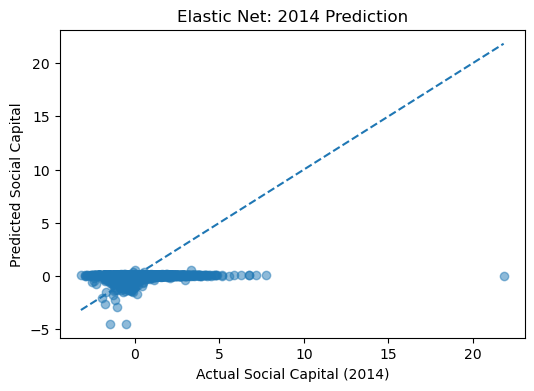

In [96]:
#Test prediction accuracy on 2014

y_pred = pipe.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(r2, rmse)

baseline_pred = np.repeat(y_train.mean(), len(y_test))

baseline_r2 = r2_score(y_test, baseline_pred)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_pred))

baseline_r2, baseline_rmse


import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         linestyle="--")
plt.xlabel("Actual Social Capital (2014)")
plt.ylabel("Predicted Social Capital")
plt.title("Elastic Net: 2014 Prediction")
plt.show()